In [1]:
import pandas as pd

In [11]:
train_df = pd.read_csv('train_set.csv', sep='\t', nrows=1000)
train_df['word'] = train_df['text'].apply(lambda x: len(x.split(' ')))

In [3]:
train_df.head()

,label,text,word
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...,1057
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...,486
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...,764
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...,1570
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...,307


### task2 对数据集字符进行可视化，统计标签和字符分布

In [4]:
# 数据集中所有句子所包含字符的平均个数
train_df['word'].mean()

904.309

In [5]:
# 数据集中不同类别下句子平均字符的个数
train_df.groupby('label')['word'].mean()

label
0      881.795580
1      874.927184
2      942.828947
3      762.646018
4      693.765432
5     1102.065574
6     1353.651163
7     1074.604651
8      861.568182
9     1138.478261
10     868.666667
11     514.785714
12    1000.833333
13    1064.000000
Name: word, dtype: float64

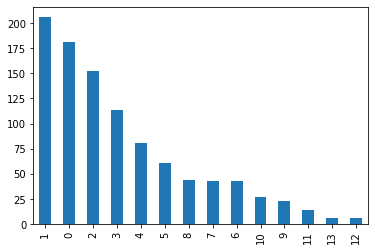

In [12]:
train_df['label'].value_counts().plot(kind='bar')

1     206
0     181
2     152
3     113
4      81
5      61
8      44
7      43
6      43
10     27
9      23
11     14
13      6
12      6
Name: label, dtype: int64


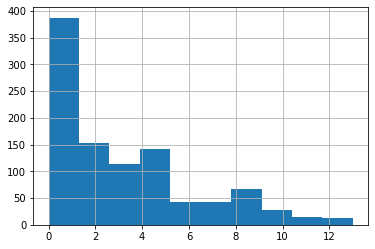

In [6]:
# 数据集中类别分布的规律
print(train_df['label'].value_counts())
train_df['label'].hist()

In [7]:
pd.DataFrame(' '.join(train_df[train_df['label'] == 0]['text']).split(' '))[0].value_counts().iloc[:5].index

Index(['3750', '648', '900', '3370', '4464'], dtype='object')

In [8]:
## 数据集中不同类别下句子中最常见的5个字符
for c in range(14):
    print(c, pd.DataFrame(' '.join(train_df[train_df['label'] == 0]['text']).split(' '))[0].value_counts().iloc[:5].index)

0 Index(['3750', '648', '900', '3370', '4464'], dtype='object')
1 Index(['3750', '648', '900', '3370', '4464'], dtype='object')
2 Index(['3750', '648', '900', '3370', '4464'], dtype='object')
3 Index(['3750', '648', '900', '3370', '4464'], dtype='object')
4 Index(['3750', '648', '900', '3370', '4464'], dtype='object')
5 Index(['3750', '648', '900', '3370', '4464'], dtype='object')
6 Index(['3750', '648', '900', '3370', '4464'], dtype='object')
7 Index(['3750', '648', '900', '3370', '4464'], dtype='object')
8 Index(['3750', '648', '900', '3370', '4464'], dtype='object')
9 Index(['3750', '648', '900', '3370', '4464'], dtype='object')
10 Index(['3750', '648', '900', '3370', '4464'], dtype='object')
11 Index(['3750', '648', '900', '3370', '4464'], dtype='object')
12 Index(['3750', '648', '900', '3370', '4464'], dtype='object')
13 Index(['3750', '648', '900', '3370', '4464'], dtype='object')


### task3   使用机器学习进行文本分类

In [9]:
# Count Vectors + RidgeClassifier

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import f1_score

train_df = pd.read_csv('train_set.csv', sep='\t', nrows=15000)

vectorizer = CountVectorizer(max_features=3000)
train_test = vectorizer.fit_transform(train_df['text'])

clf = RidgeClassifier()
clf.fit(train_test[:10000], train_df['label'].values[:10000])

val_pred = clf.predict(train_test[10000:])
print(f1_score(train_df['label'].values[10000:], val_pred, average='macro'))

0.7402319791899036


In [10]:
# TF-IDF +  RidgeClassifier

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import f1_score

train_df = pd.read_csv('train_set.csv', sep='\t', nrows=15000)

tfidf = TfidfVectorizer(ngram_range=(1,3), max_features=3000)
train_test = tfidf.fit_transform(train_df['text'])

clf = RidgeClassifier()
clf.fit(train_test[:10000], train_df['label'].values[:10000])

val_pred = clf.predict(train_test[10000:])
print(f1_score(train_df['label'].values[10000:], val_pred, average='macro'))

0.8721598830546126
